# Plot "cm_line" figure

- Load results from './results*plot/fig_cm_line*\*.csv'
- Requires 3 CSV files in total `['texture', 'australian', 'yeast']`
- **[Warning]:** The font "Times New Roman" is only supported in Microsoft Windows OS!


In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)
PATH_OUTPUT = os.path.join(PATH_ROOT, "results_plot")
print(PATH_OUTPUT)


/home/lukec/workspace/diva_01
/home/lukec/workspace/diva_01/results_plot


In [3]:
FILE_FIG_DATA_NAMES = [f'fig_cm_line_{dataset}.csv' for dataset in ['texture', 'australian', 'yeast']]
dfs = []
for file_fig in FILE_FIG_DATA_NAMES:
    _df = pd.read_csv(os.path.join(PATH_OUTPUT, file_fig))
    dfs.append(_df)


In [4]:
dfs[0]


,Rate,Measure,Value
0,0.0,C1,0.999721
1,0.0,C2,0.000772
2,0.0,F1,0.573084
3,0.0,F3,0.000000
4,0.0,F4,0.000000
...,...,...,...
67,0.4,F3,0.706000
68,0.4,F4,0.253000
69,0.4,N4 SD,0.287957
70,0.4,Train,0.986500


In [5]:
color_dict = {
    'Accuracy': 'darkgrey',
    'C-Measures': 'darkgrey',
    'C1': 'darkgrey',
    'C2': 'darkgrey',
    'F1': 'darkgrey',
    'F1 SD': 'darkgrey',
    'F1v': 'darkgrey',
    'F3': 'darkgrey',
    'F4': 'darkgrey',
    'Hubs': 'darkgrey',
    'L1': 'darkgrey',
    'N4 SD': 'darkgrey',
    'Test': '#2e7d32',
    'Train': '#2e7d32',
}
sns.color_palette(list(color_dict.values()))

# Custom colors
keys1 = ['C1', 'C2', 'F1 SD', 'F1v', 'Hubs', 'L1', 'Train', 'Test']
palette1 = sns.color_palette([color_dict[key] for key in keys1])

keys2 = ['C1', 'C2', 'F1', 'F3', 'F4', 'N4 SD', 'Train', 'Test']
palette2 = sns.color_palette([color_dict[key] for key in keys2])


In [6]:
FONTSIZE = 13
FIGSIZE = (9, 2.5)
LINEWIDTH = 2.5
TITLES = [
    '(a) Texture (Easy)',
    '(b) Australian (Normal)',
    '(c) Yeast (Hard)'
]
LABELS = [
    'C-Measures',
    'Training Acc.',
    'Testing Acc.',
]
COLOURS = {
    'Train': '#2e7d32',
    'Test': '#2e7d32',  # Both using Green indicates it's for ALFA
}

line_style = ['Accuracy' if a in ['Train', 'Test'] else 'C-Measures' for a in dfs[0]['Measure']]


In [7]:
def get_linestyle(name):
    if name == 'Train':
        return 'dashed'
    else:
        return 'solid'


def draw_subplot(df, dataname, ax):
    # line_style = ['Accuracy' if a in ['Train', 'Test'] else 'C-Measures' for a in df_pivot['Measure']]
    line_style = [get_linestyle(m) for m in df['Measure']]
    sns.lineplot(data=df, x='Rate', y='Value', hue='Measure', ax=ax,
                 style=line_style, alpha=0.9, legend='auto', palette=palette1, linewidth=LINEWIDTH)

    ax.set(xlim=[-0.02, 0.42], ylim=[-0.05, 1.05])
    ax.set_title(dataname, y=0, pad=-45, verticalalignment="top")
    ax.set_xlabel('Poisoning Rate')
    ax.set_ylabel('Measure')
    ax.set_xticks(np.linspace(0, 0.40, num=5, endpoint=True))
    ax.set_yticks(np.linspace(0, 1, num=5, endpoint=True), fontsize=FONTSIZE - 1)
    ax.get_legend().remove()


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Save to: /home/lukec/workspace/diva_01/results_plot/cm_line.pdf


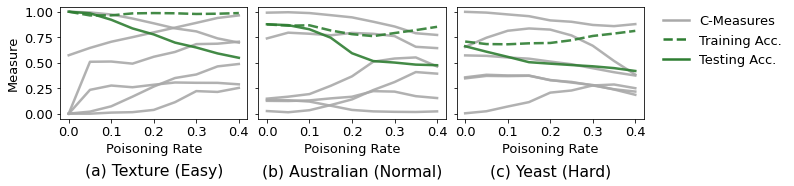

In [8]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = FONTSIZE
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=FIGSIZE)
# sns.set_style(style='ticks')


for i in range(len(dfs)):
    draw_subplot(dfs[i], TITLES[i], axes[i])

label_dict = {}
for i in range(3):
    # Merge lines and labels
    lines, labels = axes[i].get_legend_handles_labels()
    for line, label in zip(lines, labels):
        label_dict[label] = line

custom_lines = [
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, label=LABELS[0]),
    Line2D([0], [0], color=COLOURS['Train'], lw=LINEWIDTH, label=LABELS[1], linestyle='dashed'),
    Line2D([0], [0], color=COLOURS['Test'], lw=LINEWIDTH, label=LABELS[2]),
]
fig.legend(handles=custom_lines, bbox_to_anchor=(1, 1), loc="upper left", frameon=False)

plt.tight_layout(pad=0.3)
path_fig_out = os.path.join(PATH_OUTPUT, f'cm_line.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')
print(f'Save to: {path_fig_out}')
